# Machine Learning Workflow

## 1. Data Preprocessing
### Handle Missing Values
- Identify missing values in the dataset.
- Impute missing values using techniques like mean, median, mode, or advanced imputation methods such as KNN imputation.

### Data Cleaning
- Remove duplicate rows or columns if present.
- Identify and handle outliers using statistical methods or domain knowledge.
- Correct errors or inconsistencies in the data.

### Data Transformation
- Encode categorical variables into numerical format using techniques like one-hot encoding or label encoding.
- Normalize numerical features to bring them to a similar scale.
- Standardize numerical features to have a mean of 0 and a standard deviation of 1.

### Feature Engineering
- Create new features based on domain knowledge or insights gained from EDA.
- Transform existing features using mathematical operations such as logarithm, square root, or polynomial transformations.
- Select relevant features using techniques like correlation analysis, feature importance, or domain knowledge.

## 2. Exploratory Data Analysis (EDA)
### Univariate Analysis
- Visualize the distribution of individual features using histograms, box plots, or density plots.
- Compute summary statistics such as mean, median, mode, standard deviation, etc.

### Bivariate Analysis
- Explore relationships between pairs of variables using scatter plots, correlation matrices, or heatmaps.
- Identify patterns, trends, or correlations that may exist between features and the target variable.

### Multivariate Analysis
- Visualize relationships between multiple variables using techniques like pair plots or three-dimensional plots.
- Identify complex interactions or dependencies between features.

### Anomaly Detection
- Detect anomalies or outliers using statistical methods such as Z-score, IQR, or machine learning algorithms like Isolation Forest or Local Outlier Factor.
- Investigate the nature of anomalies and determine whether they should be removed or retained.

## 3. Data Splitting
### Train-Validation-Test Split
- Split the dataset into three sets: training set, validation set, and test set.
- Typically, allocate the majority of the data to the training set (e.g., 70-80%), with smaller portions for the validation and test sets.

## 4. Model Selection
### Choose Algorithm
- Select a machine learning algorithm suitable for the problem at hand (e.g., logistic regression, decision trees, random forests, support vector machines).

### Considerations
- Consider factors such as interpretability, computational complexity, scalability, and performance metrics.

## 5. Model Training
### Train Model
- Train the selected model using the training dataset.
- Fit the model to the training data and adjust its parameters to minimize the loss function.

### Hyperparameter Tuning
- Tune hyperparameters using techniques like Grid Search, Random Search, or Bayesian Optimization to optimize model performance.

## 6. Model Evaluation
### Performance Metrics
- Evaluate the trained model using appropriate performance metrics (e.g., accuracy, precision, recall, F1 score, ROC-AUC).
- Assess how well the model generalizes to unseen data.

### Error Analysis
- Analyze model errors to identify patterns or common pitfalls.
- Determine whether certain classes or features are more prone to misclassification.

## 7. Model Fine-Tuning
### Refinement
- Refine the model based on insights gained from evaluation.
- Adjust hyperparameters, feature selection, or preprocessing techniques as needed.

### Iteration
- Iterate through the training and evaluation process multiple times to improve model performance gradually.

## 8. Model Validation
### Test Set Evaluation
- Validate the final model using the test set to assess its generalization performance.
- Ensure that the model performs well on unseen data and isn't overfitting to the training set.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report , accuracy_score , roc_auc_score , roc_curve


In [4]:
## Reading the data
data = pd.read_csv('../Dataset/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [7]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

## Data Cleaning

In [8]:
## Checking for duplicates
data.duplicated().sum()
data_transposed = data.T
data_transposed.duplicated().sum()

0

<Axes: >

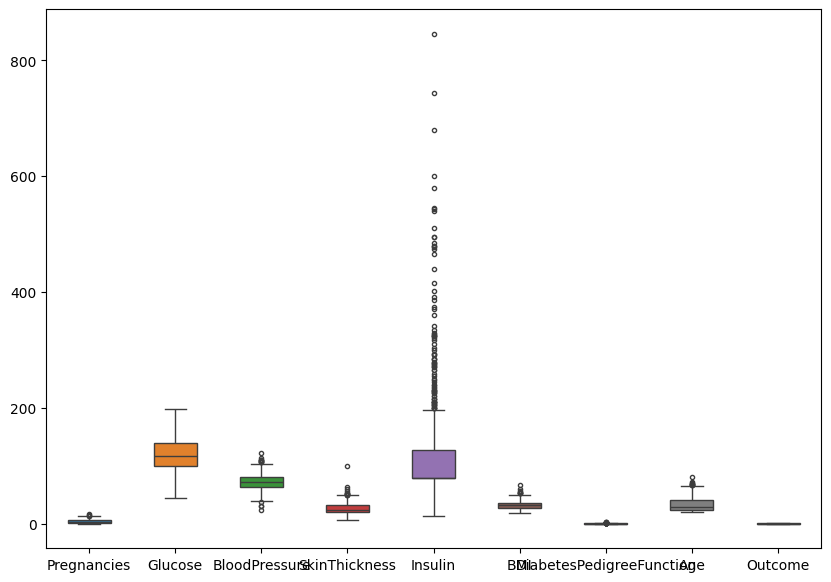

In [9]:
## Outlier Detection
plt.figure(figsize=(10,7))
sns.boxplot(data=data,width=0.5 , fliersize=3 , ax = plt.gca())

WE can not replace the outlier simply with mean or median as it will affect the data. Also this data is collected from different sources and we can not simply remove it. So we will use KNN imputer to replace the values. not here .

In [10]:
## Data Transformation
# Normalizing the data
from sklearn.preprocessing import minmax_scale
data_scaled = minmax_scale(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.079086,0.314928,0.234415,0.483333,1.0
1,0.058824,0.264516,0.428571,0.239130,0.079086,0.171779,0.116567,0.166667,0.0
2,0.470588,0.896774,0.408163,0.147135,0.079086,0.104294,0.253629,0.183333,1.0
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000,0.0
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000,1.0


<Axes: >

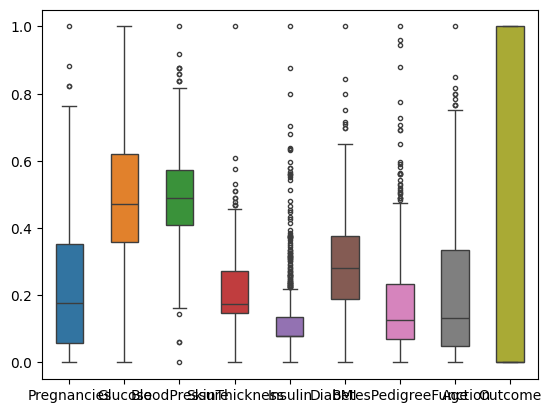

In [11]:
sns.boxplot(data=data_scaled,width=0.5 , fliersize=3 , ax = plt.gca())

In [12]:
## standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995,1.365896
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672,-0.732120
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584,1.365896
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496,1.365896


<Axes: >

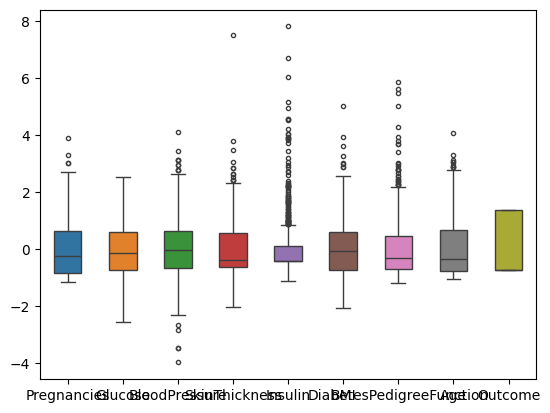

In [13]:
sns.boxplot(data=data_scaled,width=0.5 , fliersize=3 , ax = plt.gca())

If the distribution of your features is approximately Gaussian (normal), standard scaling may be more appropriate.

If you want to bound your features within a specific range (e.g., 0 to 1), normalization is a better choice.

If your dataset contains outliers and you want to minimize their impact, standard scaling may be preferable.

In [14]:
## Splitting the data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

<Axes: >

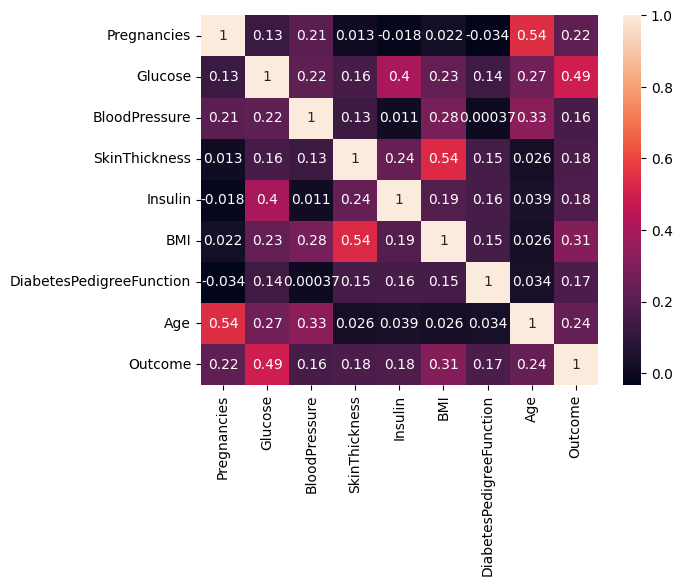

In [15]:
sns.heatmap(data_scaled.corr(), annot=True)

In [16]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


The line of code you've selected is importing the `variance_inflation_factor` function from the `statsmodels` library in Python.

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor
```

The `variance_inflation_factor` function is used to estimate the degree of multicollinearity in a regression analysis. Multicollinearity refers to the correlation between predictor variables (or independent variables), in a multiple regression model. 

The Variance Inflation Factor (VIF) is a measure of multicollinearity. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of multicollinearity. 

If the VIF is equal to 1, there is no multicollinearity among factors, but if the VIF is greater than 1, the predictors may be moderately correlated. The higher the value, the greater the correlation of the variable with other variables. 

This function is typically used in a loop to calculate the VIF for each predictor variable in a model.

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [18]:
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values , i) for i in range(df.shape[1])]
    return(vif)


print(calculate_vif(X))

                  variables        VIF
0               Pregnancies   3.274890
1                   Glucose  21.351046
2             BloodPressure  31.910800
3             SkinThickness  12.518597
4                   Insulin   3.307851
5                       BMI  32.797700
6  DiabetesPedigreeFunction   3.182662
7                       Age  14.249252


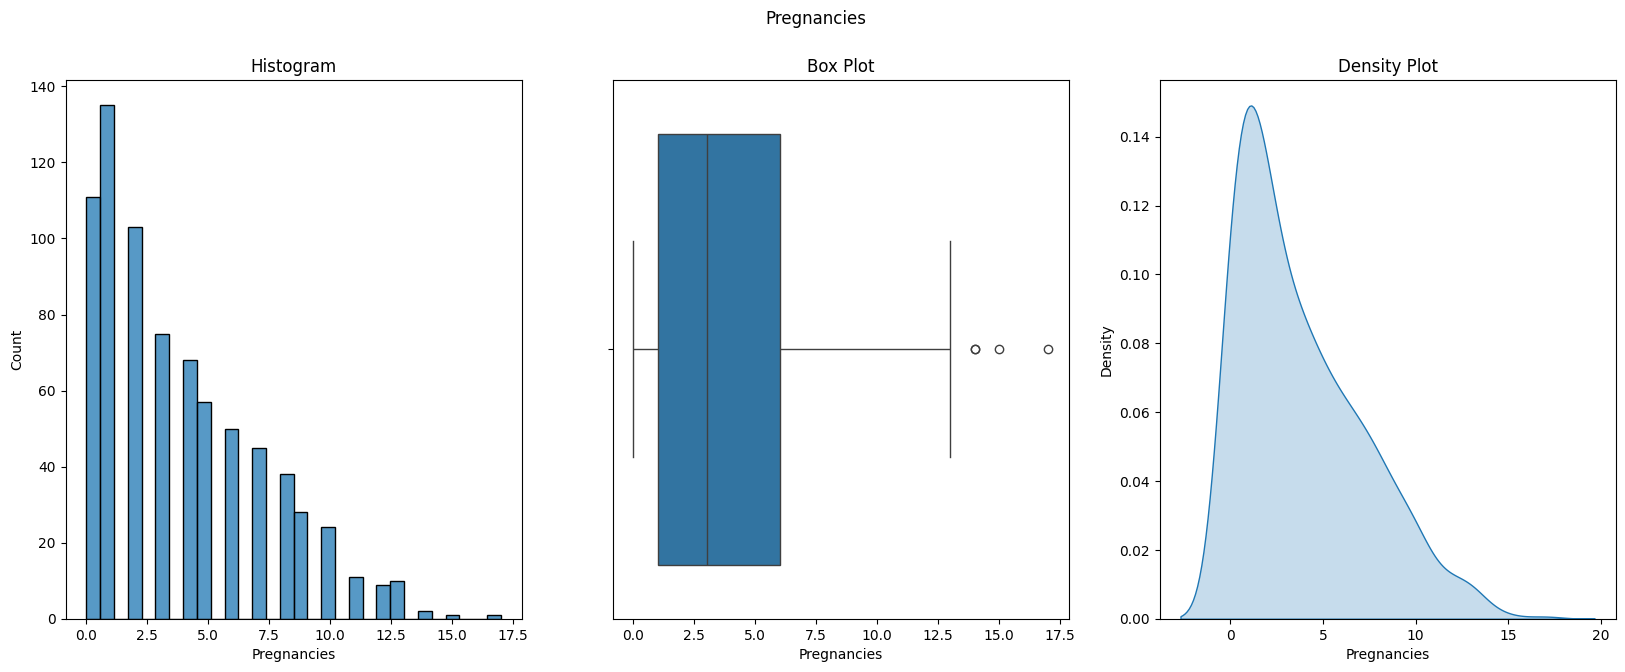

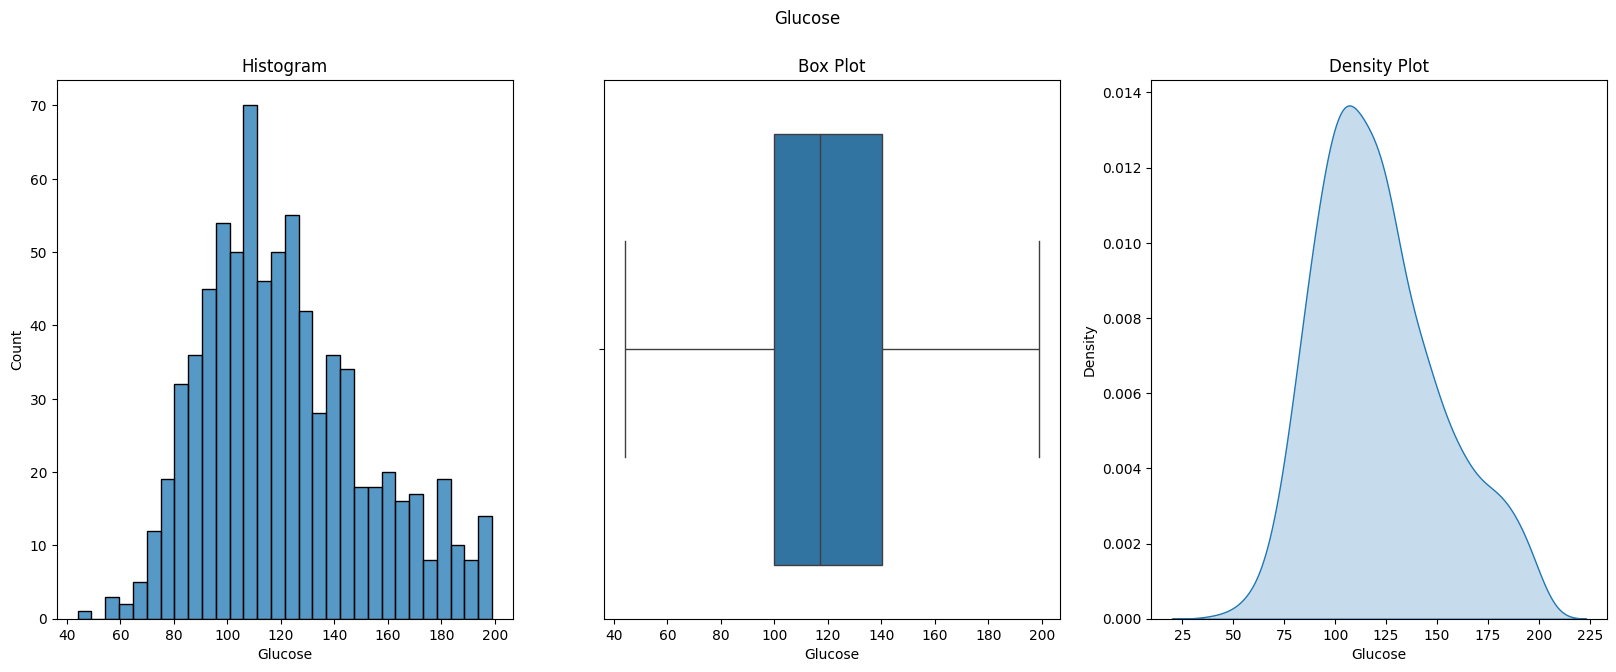

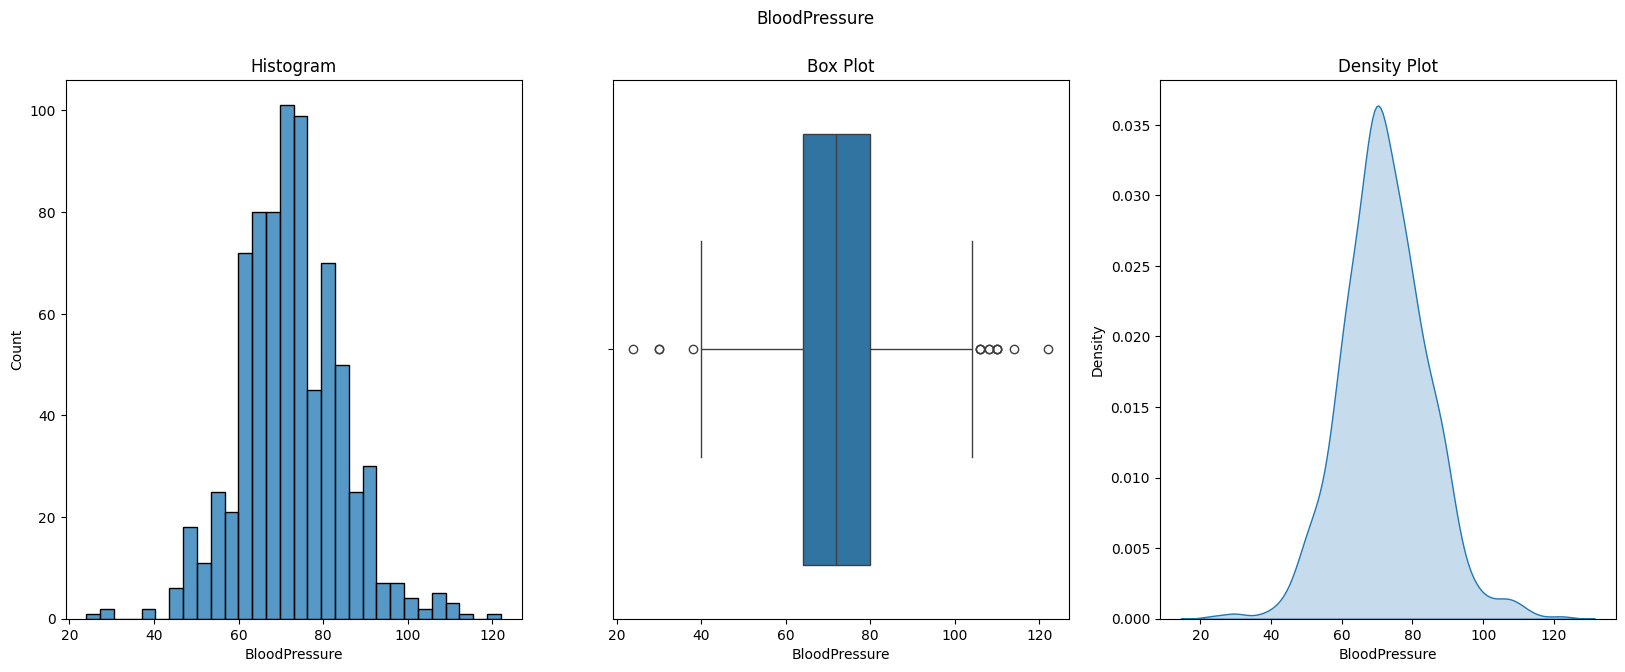

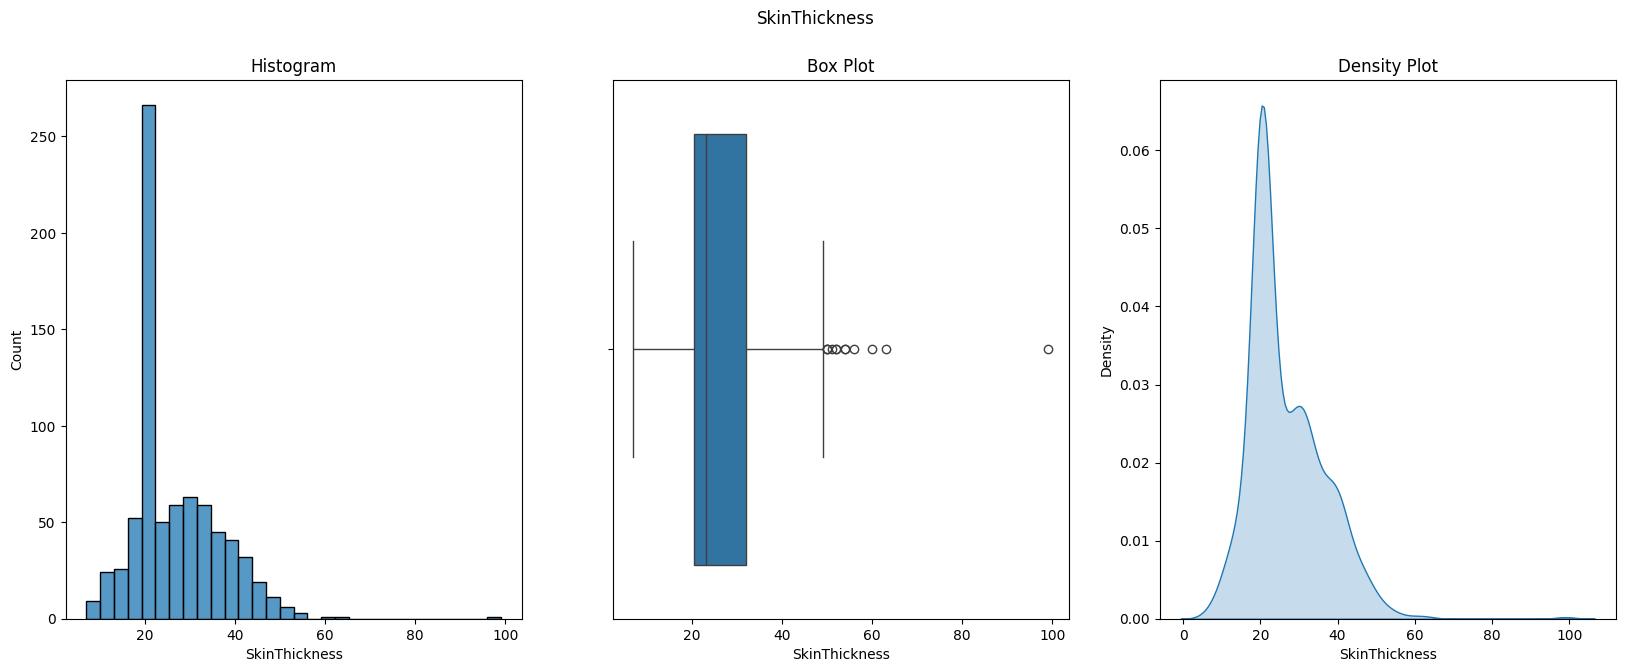

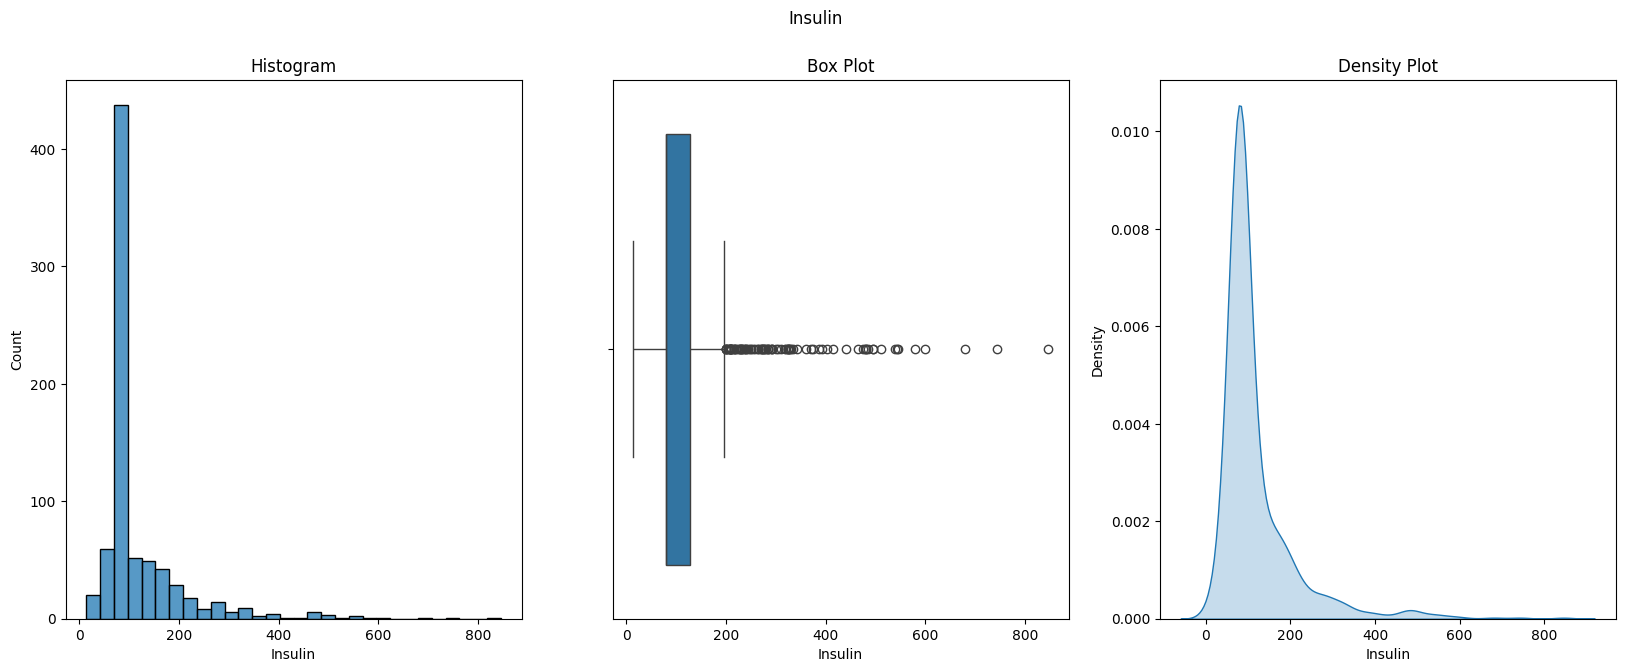

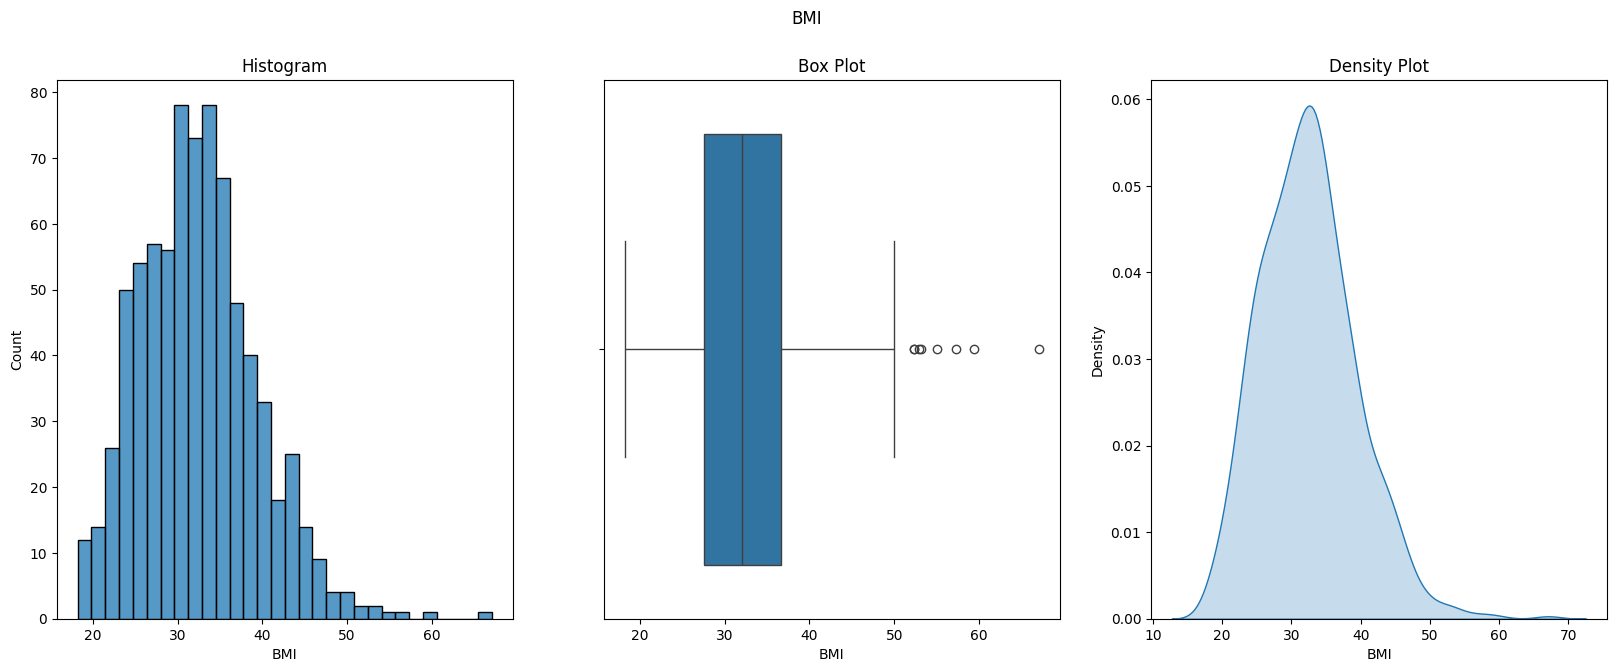

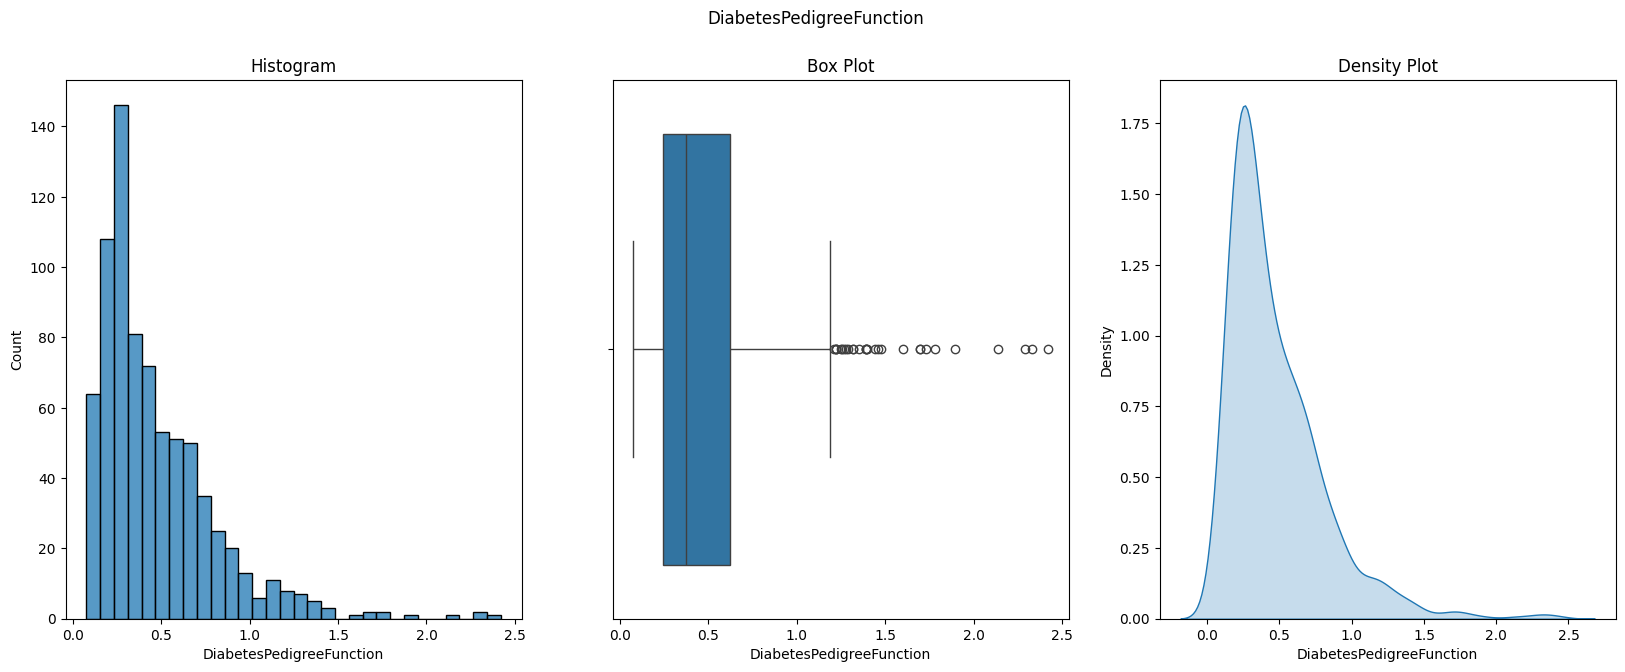

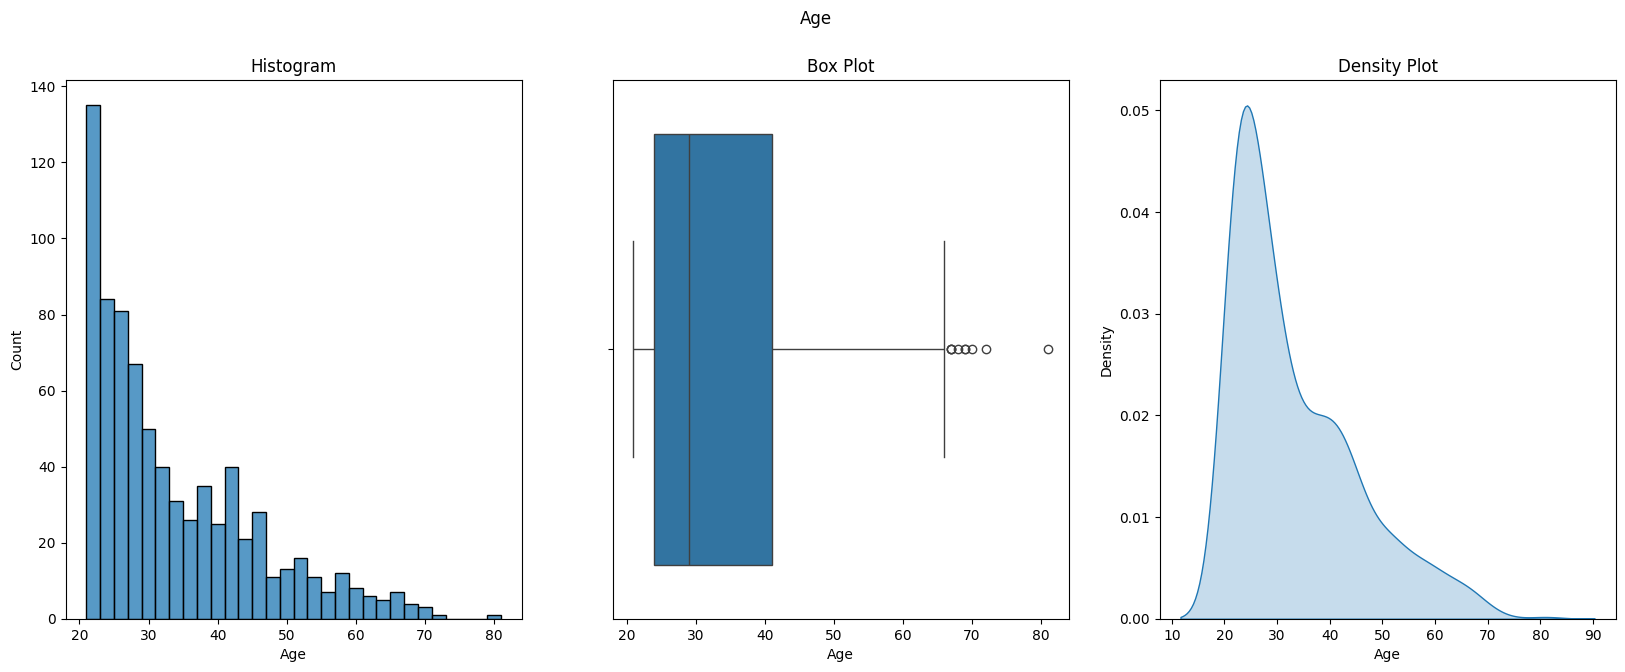

In [19]:
# Visualize the distribution of individual features using histograms, box plots, or density plots.

columns = X.columns

for column in columns:
    plt.figure(figsize=(20,7))
    
        # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(X[column], bins=30, kde=False)
    plt.title('Histogram')

    # Box plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=X[column])
    plt.title('Box Plot')

    # Density plot
    plt.subplot(1, 3, 3)
    sns.kdeplot(X[column], fill=True)
    plt.title('Density Plot')

    plt.suptitle(column)
    plt.show()

Winsorization is a way to minimize the influence of outliers in your data. It involves setting all outliers to a specified percentile of the data; for example, a 90% winsorization would see all data below the 5th percentile set to the 5th percentile, and data above the 95th percentile set to the 95th percentile.

You can use the `winsorize` function from the `scipy.stats.mstats` module to apply winsorization in Python. Here's how you can apply it to the 'Insulin' column of your DataFrame:


In this code:

- `winsorize(df['Insulin'], limits=[lower_bound, upper_bound])` applies winsorization to the 'Insulin' column. The `limits` parameter is a list where the first element is the proportion of scores at the lower end of the distribution to winsorize and the second element is the proportion of scores at the upper end.
- `df['Insulin'] = ...` replaces the original 'Insulin' column with the winsorized version.

Please adjust the `lower_bound` and `upper_bound` according to your requirements.

<Axes: >

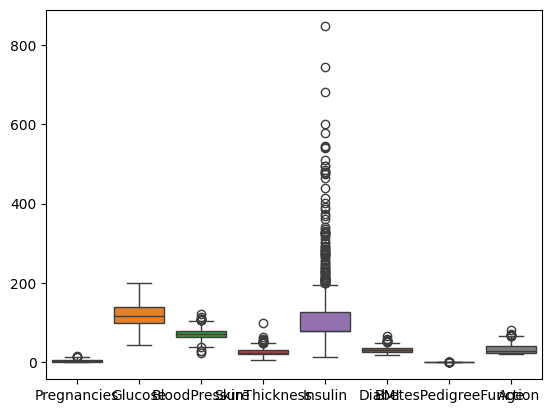

In [20]:
sns.boxplot(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [22]:
import pickle

def scaler_standard(X_train,X_test):
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    file = open('scaler.pkl', 'wb')
    pickle.dump(scaler, file)
    file.close()
    
    return X_train_scaled, X_test_scaled

In [23]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

In [25]:
parameters = {'C':[0.001,0.01,0.1,1,10,100,1000], 'penalty':['l1','l2','elasticnet','none'] , 'solver':['newton-cg','lbfgs','liblinear'] , 'max_iter':[100,1000,10000], 'multi_class':['auto','ovr','multinomial'] }

In [26]:
logistic_regression = LogisticRegression() 

In [27]:
clif = GridSearchCV(logistic_regression, param_grid=parameters,scoring='accuracy', cv=10)

In [28]:
clif.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [29]:
clif.best_params_

{'C': 1,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'liblinear'}

In [30]:
logistic_regression = LogisticRegression(C=1, max_iter=100, multi_class='auto', penalty='l2', solver='liblinear')

In [31]:
clif.best_score_

0.763793103448276

In [32]:
y_pred = clif.predict(X_test_scaled)

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [34]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]


In [35]:
accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)

In [36]:
accuracy

0.796875

In [37]:
precision = true_positive/(true_positive+false_positive)
precision

0.9

In [38]:
recall = true_positive/(true_positive+false_negative)
recall

0.8181818181818182

In [39]:
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.8571428571428572

In [40]:
clif

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 1000, 10000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [41]:
import pickle
file = open('logistic_regression.pkl','wb')
pickle.dump(clif,file)
file.close()

In [42]:
file.close()